In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_boston

df = pd.read_csv("자외선지수.csv",encoding='cp949').drop(['지점','지점명','일시'], axis = 1)

In [2]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 4 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   일최대 자외선 B(W/m2 )                   85 non-null     float64
 1   평균 오존전량(DU)                        85 non-null     float64
 2   평균 미세입자 크기별 수농도(0.008∼1.2 ㎛)(개/㎤)  85 non-null     int64  
 3   자외선지수                              85 non-null     int64  
dtypes: float64(2), int64(2)
memory usage: 2.8 KB
None


In [3]:
z = df['일최대 자외선 B(W/m2 )']*df['평균 오존전량(DU)']

array([[<AxesSubplot:xlabel='일최대 자외선 B(W/m2 )', ylabel='일최대 자외선 B(W/m2 )'>,
        <AxesSubplot:xlabel='평균 오존전량(DU)', ylabel='일최대 자외선 B(W/m2 )'>,
        <AxesSubplot:xlabel='평균 미세입자 크기별 수농도(0.008∼1.2 ㎛)(개/㎤)', ylabel='일최대 자외선 B(W/m2 )'>,
        <AxesSubplot:xlabel='자외선지수', ylabel='일최대 자외선 B(W/m2 )'>],
       [<AxesSubplot:xlabel='일최대 자외선 B(W/m2 )', ylabel='평균 오존전량(DU)'>,
        <AxesSubplot:xlabel='평균 오존전량(DU)', ylabel='평균 오존전량(DU)'>,
        <AxesSubplot:xlabel='평균 미세입자 크기별 수농도(0.008∼1.2 ㎛)(개/㎤)', ylabel='평균 오존전량(DU)'>,
        <AxesSubplot:xlabel='자외선지수', ylabel='평균 오존전량(DU)'>],
       [<AxesSubplot:xlabel='일최대 자외선 B(W/m2 )', ylabel='평균 미세입자 크기별 수농도(0.008∼1.2 ㎛)(개/㎤)'>,
        <AxesSubplot:xlabel='평균 오존전량(DU)', ylabel='평균 미세입자 크기별 수농도(0.008∼1.2 ㎛)(개/㎤)'>,
        <AxesSubplot:xlabel='평균 미세입자 크기별 수농도(0.008∼1.2 ㎛)(개/㎤)', ylabel='평균 미세입자 크기별 수농도(0.008∼1.2 ㎛)(개/㎤)'>,
        <AxesSubplot:xlabel='자외선지수', ylabel='평균 미세입자 크기별 수농도(0.008∼1.2 ㎛)(개/㎤)'>],
       [<AxesSubplot:xlabel='일최대 자

C:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 51068 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 52572 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 45824 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 51088 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 50808 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 49440 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaconda3\lib\site-

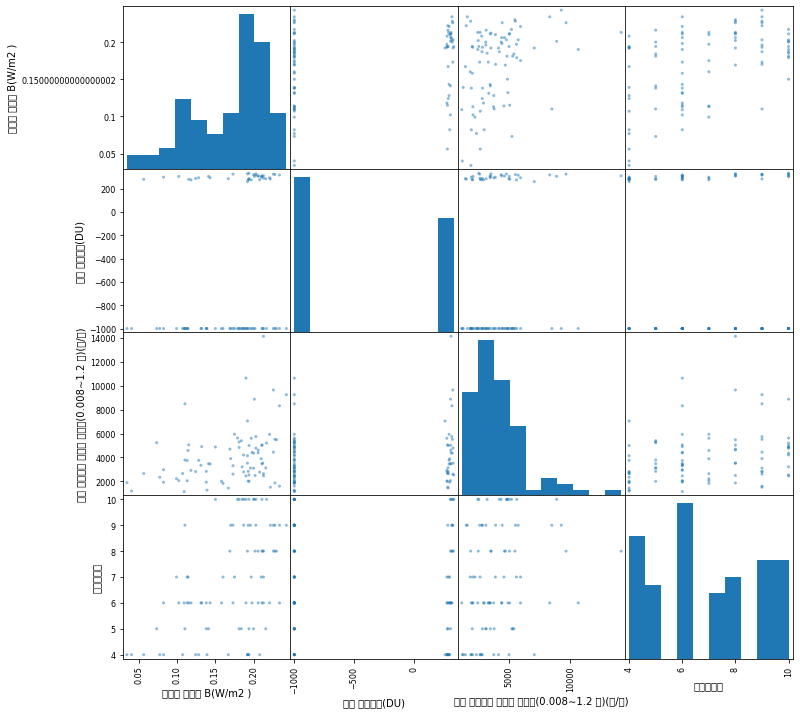

In [4]:
import matplotlib.pylab as plt

pd.plotting.scatter_matrix(df,figsize=(12,12), hist_kwds={'bins':10})

<AxesSubplot:ylabel='Frequency'>

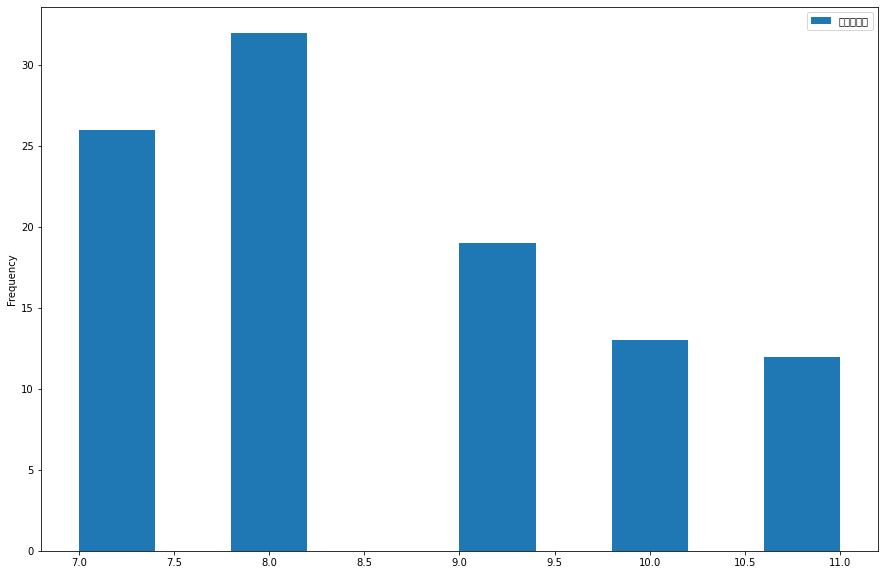

In [7]:
df.plot(kind='hist', x = '일최대 자외선 B(W/m2 )', y='자외선지수', figsize=(15,10))

In [6]:

#결측값 평균값 대체
df = df.replace(-999, np.NaN)
df.loc[df['평균 오존전량(DU)'] != df['평균 오존전량(DU)'], '평균 오존전량(DU)'] = df['평균 오존전량(DU)'].mean()

za=df[['일최대 자외선 B(W/m2 )']]
ozon=df[['평균 오존전량(DU)']]


In [7]:
import statsmodels.api as sm   
ozon1 = sm.add_constant(ozon, has_constant = "add")  #상수항 추가
model1 = sm.OLS(za, ozon1)
fitted_model1 = model1.fit()


C:\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [8]:
fitted_model1.summary()
#결과해석 
#r-squared 이 0.03로 설명력이 크지않다는것을 알 수있고 이는 더 높은 영향력을 찾을 변수를 추가하거나 다른 변수를 선택할 필요가 있다고 판단된다.   

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       일최대 자외선 B(W/m2 )   R-squared:                       0.030
Model:                            OLS   Adj. R-squared:                  0.018
Method:                 Least Squares   F-statistic:                     2.530
Date:                Mon, 27 Jun 2022   Prob (F-statistic):              0.116
Time:                        18:08:49   Log-Likelihood:                 136.58
No. Observations:                  85   AIC:                            -269.2
Df Residuals:                      83   BIC:                            -264.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -0.0427      0.134     -0.320      0.750      -0.308       0.223
평균 오존전량(DU)     0.0007      0.000      1.591      0.116      -0.000       0.002
==============================================================================
Omnibus:                        8.446   Durbin-Watson:                   1.424
Prob(Omnibus):                  0.015   Jarque-Bera (JB):                9.017
Skew:                          -0.794   Prob(JB):                       0.0110
Kurtosis:                       2.842   Cond. No.                     7.51e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.51e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [9]:
fitted_model1.params    #회귀계수출력

const         -0.042697
평균 오존전량(DU)    0.000709
dtype: float64

In [10]:
pred0 = np.dot(ozon1, fitted_model1.params) #y hat 적합값(예측값) 계산

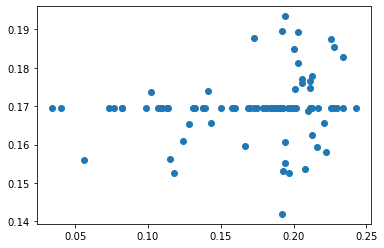

In [11]:
plt.scatter(za, pred0)

In [23]:
#결측값제거 
df = pd.read_csv("자외선지수.csv",encoding='cp949').drop(['지점','지점명','일시'], axis = 1)
df = df.replace(-999, np.NaN)


In [25]:
df_drop_row = df.dropna(axis=0)
df_drop_row

,일최대 자외선 B(W/m2 ),평균 오존전량(DU),평균 미세입자 크기별 수농도(0.008∼1.2 ㎛)(개/㎤),자외선지수
4,0.173,325.0,2604,9
8,0.201,306.1,8875,10
14,0.203,315.7,5742,9
21,0.203,327.1,4784,10
25,0.211,309.2,3466,6
31,0.211,306.6,5015,10
35,0.206,308.6,4618,8
37,0.194,333.0,2532,10
39,0.226,324.8,9642,8
44,0.228,321.6,5514,9


In [26]:
za=df_drop_row[['일최대 자외선 B(W/m2 )']]
ozon=df_drop_row[['평균 오존전량(DU)']]

In [27]:
import statsmodels.api as sm   #결측값 제거후 선형회귀
ozon1 = sm.add_constant(ozon, has_constant = "add")  #상수항 추가
model1 = sm.OLS(za, ozon1)
fitted_model1 = model1.fit()

C:\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [28]:
fitted_model1.summary()
#결과해석 
#r-squared 이 0.087로 설명력이 크지않다는것을 알 수있고 이는 더 높은 영향력을 찾을 변수를 추가하거나 다른 변수를 선택할 필요가 있다고 판단된다.   

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       일최대 자외선 B(W/m2 )   R-squared:                       0.087
Model:                            OLS   Adj. R-squared:                  0.060
Method:                 Least Squares   F-statistic:                     3.223
Date:                Mon, 27 Jun 2022   Prob (F-statistic):             0.0815
Time:                        18:18:04   Log-Likelihood:                 62.807
No. Observations:                  36   AIC:                            -121.6
Df Residuals:                      34   BIC:                            -118.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -0.0306      0.118     -0.259      0.797      -0.271       0.210
평균 오존전량(DU)     0.0007      0.000      1.795      0.081   -9.35e-05       0.002
==============================================================================
Omnibus:                        7.366   Durbin-Watson:                   1.739
Prob(Omnibus):                  0.025   Jarque-Bera (JB):                6.682
Skew:                          -1.051   Prob(JB):                       0.0354
Kurtosis:                       3.179   Cond. No.                     4.90e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.9e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [29]:
pred0 = np.dot(ozon1, fitted_model1.params) #y hat 적합값(예측값) 계산

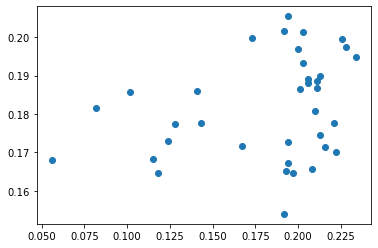

In [30]:
plt.scatter(za, pred0)

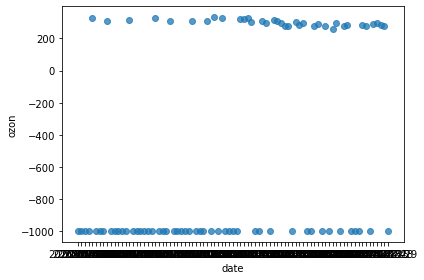

In [42]:
import pandas as pd
from matplotlib import pyplot as plt
 
data = pd.read_csv("자외선지수.csv", encoding='euc-kr')
 
날짜 = data['일시']
오존 = data['평균 오존전량(DU)']

plt.scatter(날짜, 오존,alpha=0.75)

plt.xlabel('date')
plt.ylabel('ozon')
 

plt.tight_layout()
plt.show()


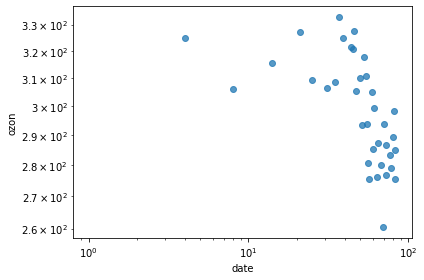

In [43]:
import pandas as pd
from matplotlib import pyplot as plt
 
data = pd.read_csv("자외선지수.csv", encoding='euc-kr')
 
날짜 = data['일시']
오존 = data['평균 오존전량(DU)']

plt.scatter(날짜, 오존,alpha=0.75)

plt.xlabel('date')
plt.ylabel('ozon')
plt.xscale('log')
plt.yscale('log')

plt.tight_layout()
plt.show()
#log 선형회귀도 방법임

In [47]:
#시그모이드함수적용
#https://woolulu.tistory.com/95 참고 
import csv

ozon_data = []

with open('자외선지수.csv', newline='') as csvfile:

    csv_reader = csv.reader(csvfile)

    ozon_header = next(csv_reader)

    ozon_data = [[float(args) for args in row] for row in csv_reader]

    ozon_data = np.array(ozon_data)

ValueError: could not convert string to float: '안면도(감)'